# Analysis of the Data

#### Load Libraries

In [1]:
from import_gitlog import GitLogCommits
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from heatmap import custom_heatmap # To display time series data as a heatmap

#### Using the GitLogCommits file we load the data into an object

In [2]:
# Create a GitlogCommits object
# open the file - and read all of the lines.
commits = GitLogCommits('changes_python.log')

#### We use the convert_to_dataframe() method to return the object as a dataframe

In [ ]:
# Change the commits to a dataframe
df_commits = commits.convert_to_dataframe()

#### We look at a single entry from the dataframe

In [3]:
print(df_commits.iloc[2])

Added                                                              0
Author                                                       Vincent
Changed Files      [drawablw-xxxhdpi:1551688), drawablw-xxxhdpi, ...
Changed Path       [M /cloud/personal/client-international/androi...
Comment                                         [enable all clients]
Date                                             2015-11-27 09:38:09
Deleted                                                            0
Modified                                                           1
Number of Lines                                                    1
Revision                                                    r1551569
Name: 2, dtype: object


#### Lets Plot with Seaborn
#### First up the total number of commits

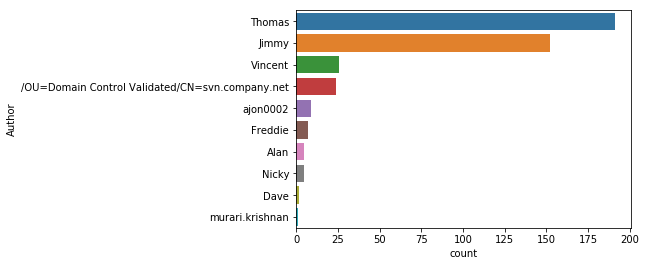

In [10]:
order = df_commits['Author'].value_counts(ascending=False).index
ax = sns.countplot(y="Author", data=df_commits, order=order)

We can see the most commits are by Thomas with Jimmy coming in a close second. Lets start breaking those down to see what our programmers are actually doing. First we look at some of the file adds. Each commit can have multiple files changed at once so even if programmer only commits once they could be changing 100s of files.

#### Lets total all the file for every commit per user

In [83]:
df_totals = df_commits.groupby('Author').sum()
df_totals = df_totals.drop(columns='Number of Lines')
df_totals['All Files'] = df_totals['Added'] + df_totals['Deleted'] + df_totals['Modified']
print(df_totals)
df_totals.reset_index(inplace=True)

                                                 Added  Deleted  Modified  \
Author                                                                      
/OU=Domain Control Validated/CN=svn.company.net      0        0        24   
Alan                                                 9        6        15   
Dave                                                10        0        66   
Freddie                                              0        0         9   
Jimmy                                              690       66       401   
Nicky                                                0        0         7   
Thomas                                              87      663       609   
Vincent                                            260       32        45   
ajon0002                                             0        0         9   
murari.krishnan                                      0        0         1   

                                                 All Files  
Author        

And lets display that visually

#### All changes to files: Added, Modified, and Deleted

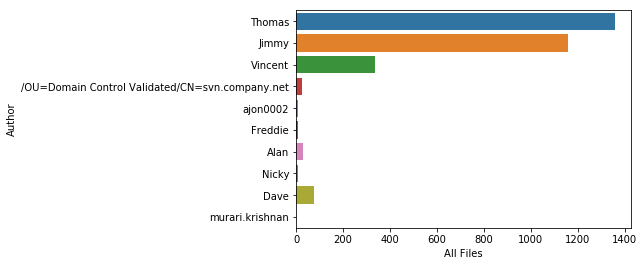

In [84]:
ax = sns.barplot(y='Author', x='All Files', data=df_totals, ci=None, order=order)

#### Files added

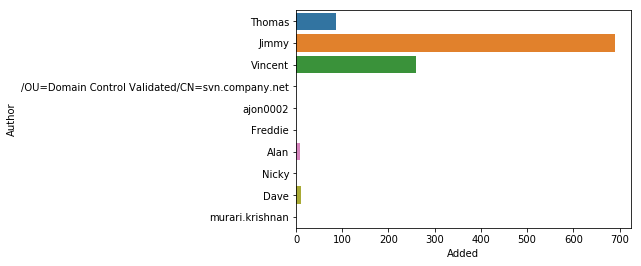

In [85]:
ax = sns.barplot(y='Author', x='Added', data=df_totals, ci=None, order=order)

So Jimmy starts the majority of files. We can look later at why this might be by looking at exactly what files he has been adding.

#### Files deleted

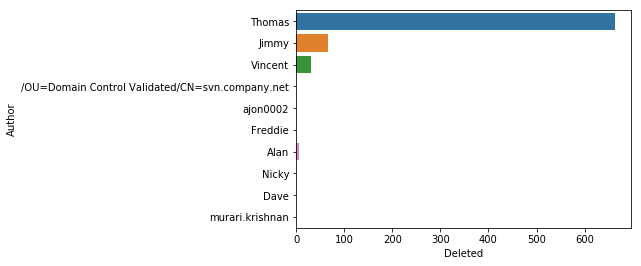

In [79]:
ax = sns.barplot(y='Author', x='Deleted', data=df_totals, ci=None, order=order)

So jimmy has been deleting 

#### Files modified

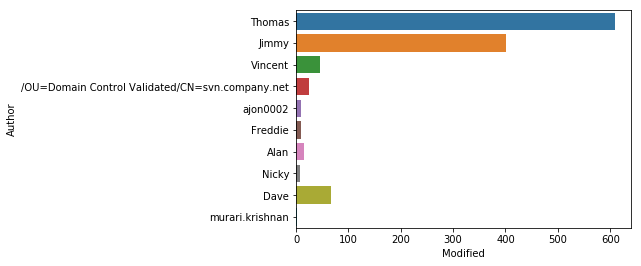

In [80]:
ax = sns.barplot(y='Author', x='Modified', data=df_totals, ci=None, order=order)

# Heatmaps

The raw number of commits isn't a great way to judge a users actual performance. After all, they could make 100 minor commits on one day and nothing on every other day. One 

In [14]:
# # Check when the first date and last commit dates were
print(df_commits['Date'].min())
print(df_commits['Date'].max())

2015-07-13 09:21:48
2015-11-27 16:57:44


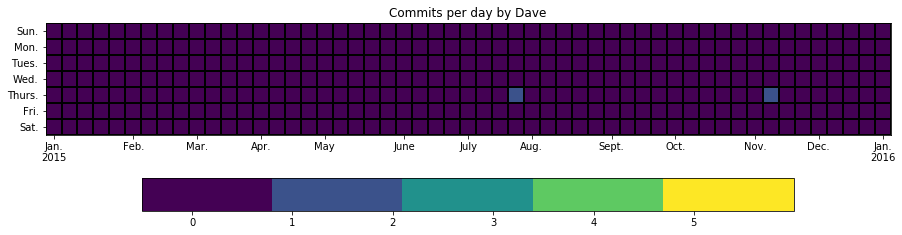

In [24]:
custom_heatmap(df_commits, 'Dave', color_range=5)

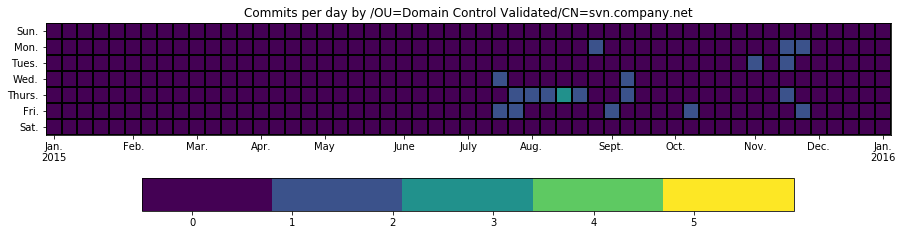

In [39]:
custom_heatmap(df_commits, '/OU=Domain Control Validated/CN=svn.company.net', color_range=5)

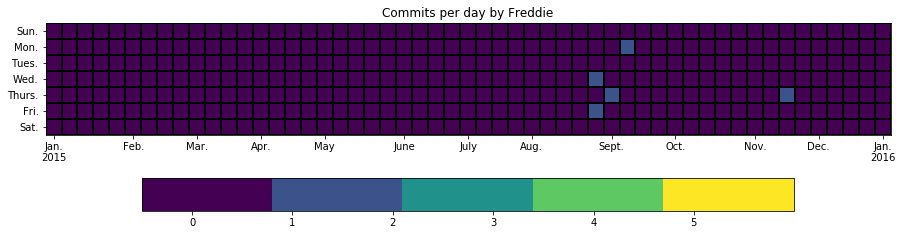

In [40]:
custom_heatmap(df_commits, 'Freddie', color_range=5)

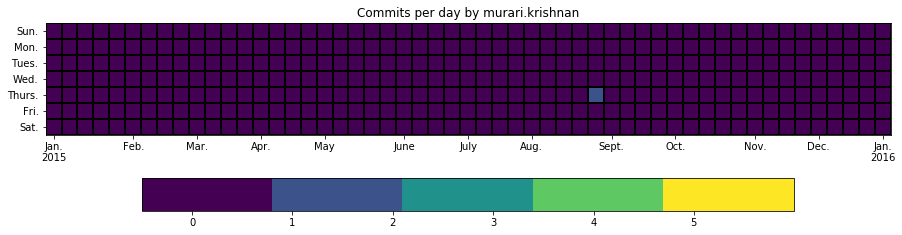

In [41]:
custom_heatmap(df_commits, 'murari.krishnan', color_range=5)

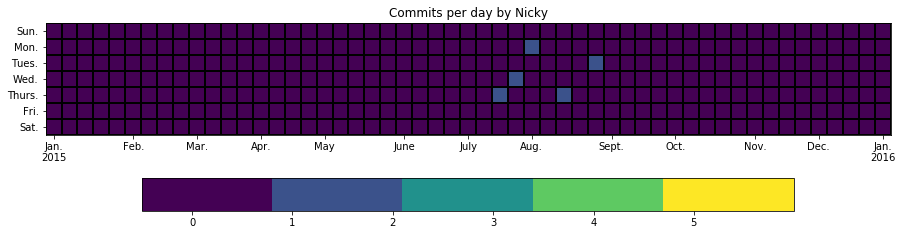

In [42]:
custom_heatmap(df_commits, 'Nicky', color_range=5)

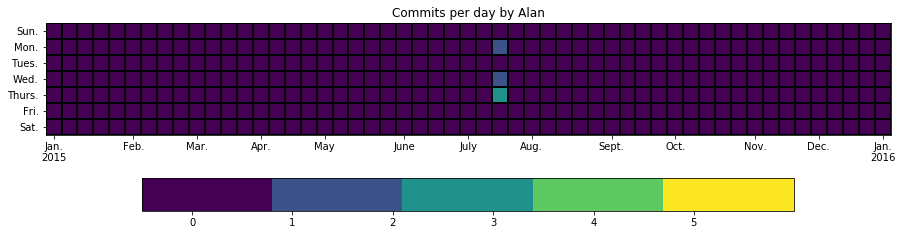

In [43]:
custom_heatmap(df_commits, 'Alan', color_range=5)

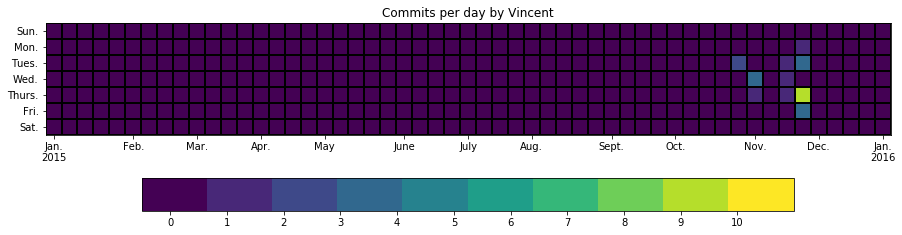

In [49]:
custom_heatmap(df_commits, 'Vincent', color_range=10)

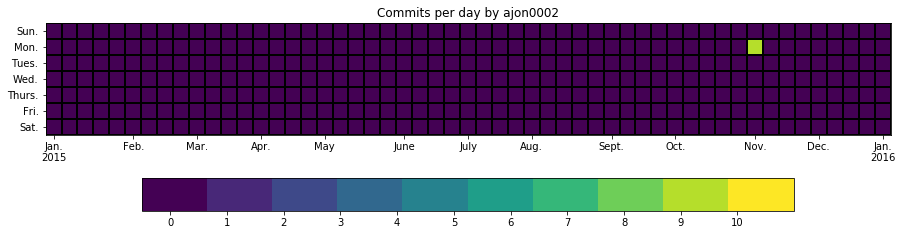

In [47]:
custom_heatmap(df_commits, 'ajon0002', color_range=10)

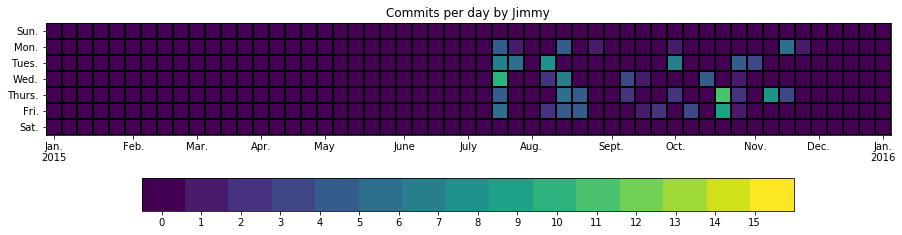

In [38]:
custom_heatmap(df_commits, 'Jimmy', color_range=15)

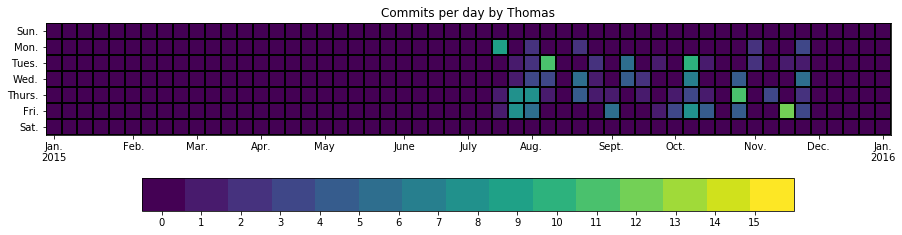

In [50]:
custom_heatmap(df_commits, 'Thomas', color_range=15)

In [86]:
48/4

12.0

In [87]:
12+12+12

36